In [1]:
# Task: redict whether a passenger was transported to an alternate dimension

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')


In [8]:
tmp_test = tmp_test.reindex(columns=tmp.columns, fill_value=0)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
y = pd.get_dummies(y, drop_first=True).values.ravel()
x = tmp

In [11]:
sel = SelectKBest(chi2, k=1000)
x = sel.fit_transform(x, y)
x_test = sel.transform(tmp_test.fillna(0))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, shuffle=True, random_state=42, stratify=y)

In [14]:
# Linear 
# Linear 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-Linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import (
  AdaBoostClassifier, GradientBoostingClassifier, 
  HistGradientBoostingClassifier, 
  RandomForestClassifier, ExtraTreesClassifier
)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
def spot_check(a):
  c = []
  for i in a:
    c.append(
      (i[0], Pipeline([
      (i[0], StandardScaler()),
      (i[2][0], i[2][1])
     ]))
    )
  return c

In [16]:
a = [
  ('ScaledLR', 'Scalar', ('LR', LogisticRegression(class_weight='balance'))),
  #('ScaledLDA', 'Scalar', ('LDA', LinearDiscriminantAnalysis())),
  #('ScaledKNN', 'Scalar', ('KNN', KNeighborsClassifier())),
  #('ScaledCART', 'Scalar', ('CART', DecisionTreeClassifier())),
  #('ScaledSVC', 'Scalar', ('SVC', SVC())),
  
  #('ScaledAB', 'Scalar', ('AB', AdaBoostClassifier())),
  #('ScaledGDM', 'Scalar', ('GDM', GradientBoostingClassifier())),
  #('ScaledHGB', 'Scalar', ('HGB', HistGradientBoostingClassifier())),
  #('ScaledRF', 'Scalar', ('RF', RandomForestClassifier())),
  #('ScaledXG', 'Scalar', ('XG', XGBClassifier())),
  #('ScaledET', 'Scalar', ('ET', ExtraTreesClassifier())),
]

pipelines = spot_check(a)

In [17]:
names, results = [],[]
for name, model in pipelines:
  cv = KFold(n_splits=15)
  cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
  
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean():.3f}")

ScaledLR: 0.812


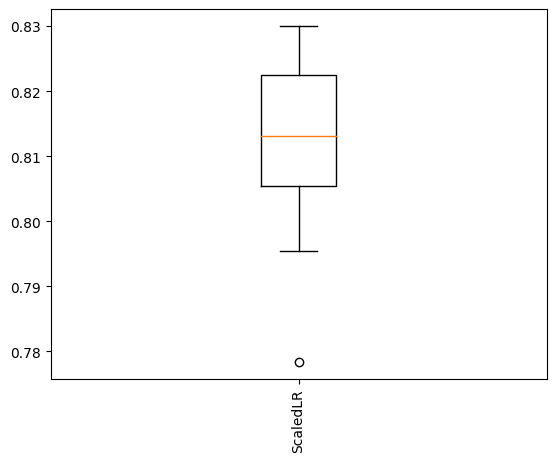

In [18]:
# Compare the algorithm
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names, rotation='vertical');

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.metrics import classification_report

In [21]:
# #ScaledLR: 0.812

# scalar = StandardScaler().fit(x_train)
# scaled_x = scalar.transform(x_train)
# param_grid = {'C': np.linspace(0.001, 2, 100)}
# model = LogisticRegression(max_iter=1000)
# kfold = KFold(n_splits=20)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
# grid_result = grid.fit(scaled_x, y_train)
# print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}")

In [44]:
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)
model = LogisticRegression(max_iter=1000, C=40.5949387781913, penalty='l2', fit_intercept=1)
model.fit(scaled_x, y_train)

scaled_x_val = scalar.transform(x_val)
pred = model.predict(scaled_x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       656
           1       0.77      0.86      0.81       666

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



In [45]:
pred_test = model.predict(x_test)
pred_test = [True if i == True else False for i in pred_test]

In [46]:
sol = test_data.pop('PassengerId')

KeyError: 'PassengerId'

In [47]:
summit = pd.DataFrame({
  "PassengerId":sol.values,
  "Transported":pred_test
})

In [26]:
summit.to_csv('summit.csv', index=False)